# 논리 회로

In [1]:
# 패키지 로드
import sys
# sys.path.append("Y:\Python\Mega_IT")

# from yjk_module.preprocessing import *
# from yjk_module.ml_module import *

# from hossam.util import *
# from hossam.plot import *

import warnings
warnings.filterwarnings('ignore')

import os
# os.chdir("Y:\Python\Mega_IT\H.Deep_Learning")
# os.getcwd()

from ipywidgets import interact
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.rcParams['font.family'] = 'D2Coding'

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

2024-04-25 11:10:22.318102: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 11:10:22.318129: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 11:10:22.318757: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 11:10:22.322303: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 11:10:22.815943: W tensorflow/compiler/tf2

In [2]:
# 데이터 로드
origin = pd.read_excel("./data/and.xlsx")
origin.head()

,x1,x2,target
0,0,0,0
1,1,0,0
2,0,1,0
3,1,1,1


In [3]:
# 독립변수 / 종속변수 분리
x = origin.drop('target', axis = 1)
y = origin['target']

rows, cols = x.shape
rows, cols

(4, 2)

In [4]:
# 모델 구성
model = Sequential()

model.add(Dense(1, input_shape = (cols, ), activation = 'linear'))
model.compile(optimizer = SGD(), loss = mse, metrics = ['acc'])
model.summary()

2024-04-25 11:10:23.378480: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22433 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:08:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
%%time
# 모델 학습
result = model.fit(x, y, epochs = 500, verbose = 0)
result

2024-04-25 11:10:23.726547: I external/local_xla/xla/service/service.cc:168] XLA service 0x5643d8d49810 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-25 11:10:23.726575: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-04-25 11:10:23.763427: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-04-25 11:10:23.765955: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
I0000 00:00:1714011023.838848  148008 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


CPU times: user 5.82 s, sys: 557 ms, total: 6.38 s
Wall time: 5.74 s


In [6]:
# 학습 결과 확인
result_df = pd.DataFrame(data = result.history)
result_df['epochs'] = result_df.index + 1
result_df.head()

,acc,loss,epochs
0,0.75,0.706016,1
1,0.75,0.680467,2
2,0.75,0.656404,3
3,0.75,0.633734,4
4,0.75,0.612369,5


In [7]:
rdf = result_df.melt(id_vars = 'epochs', var_name = 'metric', value_name = 'value')
rdf.head()

,epochs,metric,value
0,1,acc,0.75
1,2,acc,0.75
2,3,acc,0.75
3,4,acc,0.75
4,5,acc,0.75


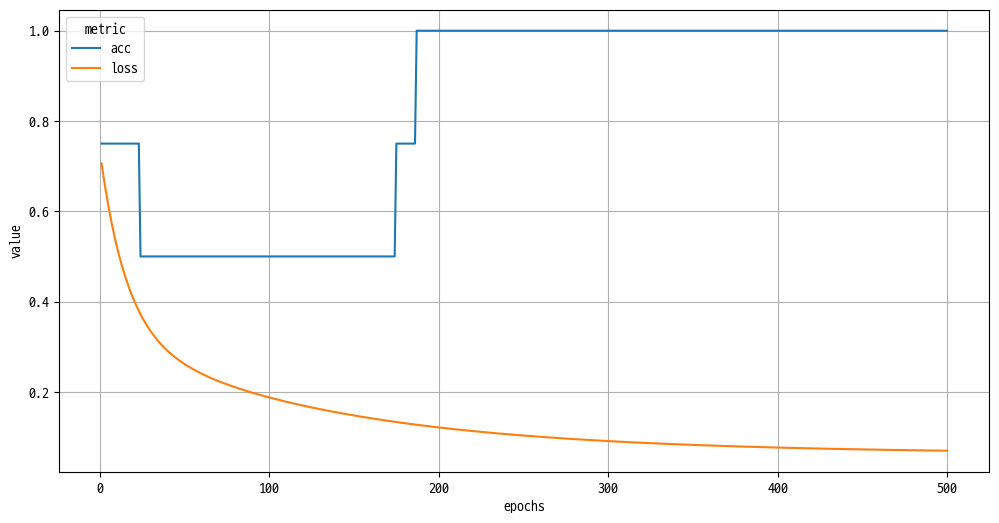

In [8]:
# 학습 결과 시각화
# my_lineplot(df = rdf, xname = 'epochs', yname = 'value', hue = 'metric')

plt.figure(figsize = (12, 6))
sns.lineplot(rdf, x = 'epochs', y = 'value', hue = 'metric')
plt.grid()
plt.show()

In [9]:
# 모델 성능 평가
# 본래는 별도의 검증 데이터를 활용해야 함
ev = model.evaluate(x, y)
ev

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - acc: 1.0000 - loss: 0.0696


[0.06964118778705597, 1.0]

In [10]:
weight, bias = model.get_weights()
print("가중치: %s" % weight)
print("편향: %s" % bias)

가중치: [[0.43193626]
 [0.3506855 ]]
편향: [-0.1210795]


In [11]:
for i in range(0, 2):
    for j in range(0, 2):
        r = model.predict(np.array([[i, j]]))
        print("입력: %d, %d => 출력: %0.2f" % (i, j, r[0][0]))
        print("%s AND %s => %s" % (bool(i), bool(j), bool(round(r[0, 0]))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
입력: 0, 0 => 출력: -0.12
False AND False => False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
입력: 0, 1 => 출력: 0.23
False AND True => False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
입력: 1, 0 => 출력: 0.31
True AND False => False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
입력: 1, 1 => 출력: 0.66
True AND True => True


In [12]:
r = model.predict(x)
r

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[-0.1210795 ],
       [ 0.31085676],
       [ 0.229606  ],
       [ 0.66154224]], dtype=float32)

In [13]:
origin["pred"] = r.reshape(-1).round()
origin

,x1,x2,target,pred
0,0,0,0,-0.0
1,1,0,0,0.0
2,0,1,0,0.0
3,1,1,1,1.0


In [14]:
# OR 논리회로 데이터 로드
# origin = my_read_excel("./data/or.xlsx", info=False)
origin = pd.read_excel("./data/or.xlsx")
origin.head()

,x1,x2,target
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,1


In [15]:
# 독립변수 / 종속변수 분리
x = origin.drop(labels="target", axis=1)
y = origin["target"]
rows, cols = x.shape
rows, cols

(4, 2)

In [16]:
# 모델 구성
model = Sequential()
model.add(Dense(1, activation="linear", input_shape=(cols,)))
model.compile(optimizer=SGD(), loss=mse, metrics=["acc"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
%%time
# 모델 훈련
result = model.fit(x, y, epochs=500, verbose=0)
result

CPU times: user 5.85 s, sys: 516 ms, total: 6.37 s
Wall time: 5.71 s


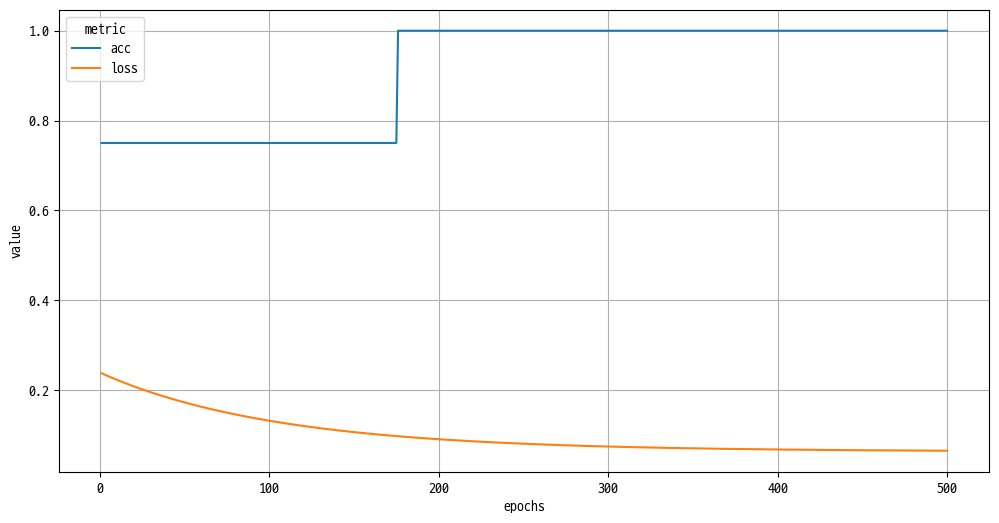

손실률: 0.06, 정확도: 1.00


In [18]:
# 훈련 결과 확인
result_df = pd.DataFrame(result.history)
result_df["epochs"] = result_df.index + 1

rdf = result_df.melt(id_vars="epochs", var_name="metric", value_name="value")

# my_lineplot(df=rdf, xname="epochs", yname="value", hue="metric")

plt.figure(figsize = (12, 6))
sns.lineplot(rdf, x = 'epochs', y = 'value', hue = 'metric')
plt.grid()
plt.show()

ev = model.evaluate(x, y, verbose=0)
print("손실률: %0.2f, 정확도: %0.2f" % (ev[0], ev[1]))

In [19]:
weight, bias = model.get_weights()
print("가중치: %s" % weight)
print("편향: %s" % bias)

가중치: [[0.50278544]
 [0.5910851 ]]
편향: [0.19432819]


In [20]:
for i in range(0, 2):
    for j in range(0, 2):
        r = model.predict(np.array([[i, j]]))
        print("입력: %d, %d => 출력: %0.2f" % (i, j, r[0][0]))
        print("%s OR %s => %s" % (bool(i), bool(j), bool(round(r[0, 0]))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
입력: 0, 0 => 출력: 0.19
False OR False => False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
입력: 0, 1 => 출력: 0.79
False OR True => True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
입력: 1, 0 => 출력: 0.70
True OR False => True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
입력: 1, 1 => 출력: 1.29
True OR True => True


In [21]:
r = model.predict(x, verbose=0)
origin["pred"] = r.reshape(-1).round()
origin

,x1,x2,target,pred
0,0,0,0,0.0
1,1,0,1,1.0
2,0,1,1,1.0
3,1,1,1,1.0


In [22]:
# XOR 데이터 로드
# origin = my_read_excel("./data/xor.xlsx", info=False)
origin = pd.read_excel("./data/xor.xlsx")
origin.head()

,x1,x2,target
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,0


In [23]:
# 독립변수 / 종속변수 분리
x = origin.drop(labels="target", axis=1)
y = origin["target"]
rows, cols = x.shape
rows, cols

(4, 2)

In [24]:
# 모델 구성
model = Sequential()
model.add(Dense(16, input_shape=(cols,), activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=RMSprop(), loss=mse, metrics=["acc"])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

2024-04-25 11:10:36.539014: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


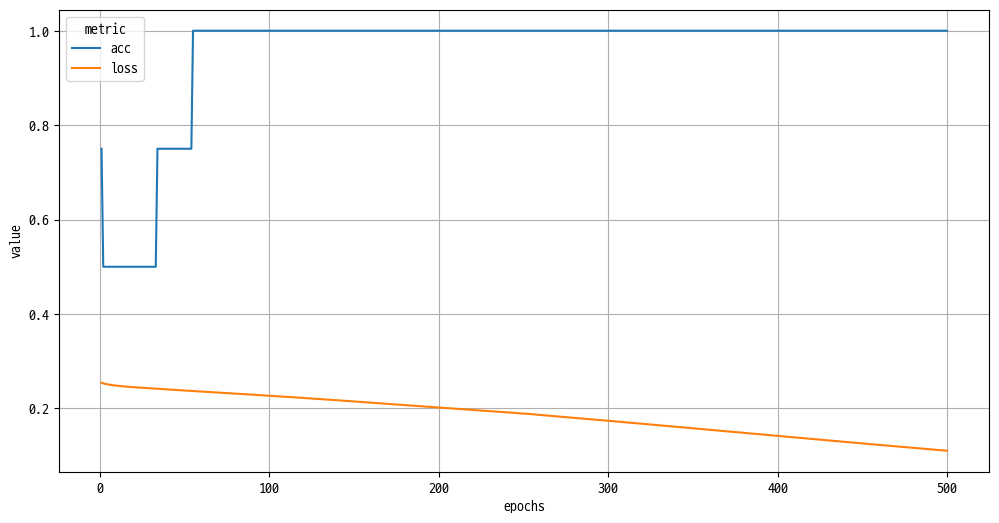

손실률: 0.11, 정확도: 1.00
CPU times: user 6.24 s, sys: 736 ms, total: 6.98 s
Wall time: 6.25 s


In [25]:
%%time
# 모델 훈련 및 결과 확인
result = model.fit(x, y, epochs=500, verbose=0)

result_df = pd.DataFrame(result.history)
result_df["epochs"] = result_df.index + 1

rdf = result_df.melt(id_vars="epochs", var_name="metric", value_name="value")

# my_lineplot(df=rdf, xname="epochs", yname="value", hue="metric")
plt.figure(figsize = (12, 6))
sns.lineplot(rdf, x = 'epochs', y = 'value', hue = 'metric')
plt.grid()
plt.show()

ev = model.evaluate(x, y, verbose=0)
print("손실률: %0.2f, 정확도: %0.2f" % (ev[0], ev[1]))

In [26]:
# 가중치 확인
weights = model.get_weights()
weights

[array([[ 0.6162154 ,  0.7802261 ,  0.44682282, -0.25425893,  0.75781095,
         -0.144847  ,  0.5343461 , -0.13849139, -0.42822453,  0.26291195,
         -0.55875415,  0.02140756, -0.27838543,  0.68546134,  0.00443893,
          0.01009433],
        [ 0.39710742, -0.78038526, -0.4460766 ,  0.56470656, -0.7573038 ,
         -0.07717168, -0.56599724, -0.35358736,  0.43015024,  0.2623059 ,
         -0.3000849 , -0.37509078, -0.5281671 ,  0.19563675, -0.12516567,
          0.7155174 ]], dtype=float32),
 array([-3.9850736e-01, -1.1080716e-04,  2.9062299e-04,  5.5331417e-05,
         3.7259894e-04,  0.0000000e+00,  1.1246710e-03,  0.0000000e+00,
        -9.8245451e-05, -2.6265302e-01,  0.0000000e+00, -2.2773312e-02,
         0.0000000e+00, -1.9630988e-01, -7.3312018e-03,  8.9156046e-04],
       dtype=float32),
 array([[-0.80839324],
        [ 0.39917755],
        [ 0.99480426],
        [ 0.86911565],
        [ 0.9062165 ],
        [ 0.16185856],
        [ 0.66995955],
        [ 0.54736567

In [27]:
# 2차원 배열 - 입력층과 은닉층을 연결하는 가중치
print(weights[0].shape)

# 1차원 배열 - 은닉층의 편향
print(weights[1].shape)

# 2차원 배열 - 은닉층과 출력층을 연결하는 가중치
print(weights[2].shape)

# 1차원 배열 - 출력층의 편향
print(weights[3].shape)

(2, 16)
(16,)
(16, 1)
(1,)


In [28]:
for i in range(0, 2):
    for j in range(0, 2):
        r = model.predict(np.array([[i, j]]))
        print("입력: %d, %d => 출력: %0.2f" % (i, j, r[0][0]))
        print("%s OR %s => %s" % (bool(i), bool(j), bool(round(r[0, 0]))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
입력: 0, 0 => 출력: 0.39
False OR False => False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
입력: 0, 1 => 출력: 0.67
False OR True => True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
입력: 1, 0 => 출력: 0.70
True OR False => True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
입력: 1, 1 => 출력: 0.30
True OR True => False


In [29]:
r = model.predict(x, verbose=0)
origin["pred"] = r.reshape(-1).round()
origin

,x1,x2,target,pred
0,0,0,0,0.0
1,1,0,1,1.0
2,0,1,1,1.0
3,1,1,0,0.0


# 자동차 제동거리

In [30]:
# 데이터 로드
origin2 = pd.read_excel("./data/cars.xlsx")
origin2.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [31]:
# 훈련 / 검증 데이터 분리
# x_train, x_test, y_train, y_test = my_train_test_split(origin2, yname='dist', test_size = 0.3)
X = origin2[['speed']]
Y = origin2['dist']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

_, cols = x_train.shape
cols

1

In [32]:
# 모델 구성
model = Sequential()

# 최종 검증 손실률: 374.854431, 최종 검증 절대오차: 15.983886
# model.add(Dense(2, activation = 'relu', input_shape = (cols, )))

# 최종 검증 손실률: 376.018341, 최종 검증 절대오차: 15.594769
model.add(Dense(4, activation = 'relu', input_shape = (cols, )))

# 최종 검증 손실률: 377.073425, 최종 검증 절대오차: 16.292393
# model.add(Dense(8, activation = 'relu', input_shape = (cols, )))

# 최종 검증 손실률: 380.726410, 최종 검증 절대오차: 16.663055
# model.add(Dense(16, activation = 'relu', input_shape = (cols, )))

# 최종 검증 손실률: 386.750305, 최종 검증 절대오차: 17.112757
# model.add(Dense(32, activation = 'relu', input_shape = (cols, )))

# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함.
model.add(Dense(1, activation='linear'))

# 손실함수는 mse, 최적화 함수는 adam --> 문자열로 지정하는 것도 가능함
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
%%time
# 모델 훈련 및 결과 확인
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, verbose=0)

evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

result_df = pd.DataFrame(result.history)
result_df["epochs"] = result_df.index + 1
result_df.set_index('epochs', inplace=True)
result_df

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 213.8293 - mae: 11.1805
최종 훈련 손실률: 215.807266, 최종 훈련 절대오차: 11.316981
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 380.3246 - mae: 16.6529
최종 검증 손실률: 380.324585, 최종 검증 절대오차: 16.652887
CPU times: user 12.9 s, sys: 1.05 s, total: 14 s
Wall time: 12.6 s


,loss,mae,val_loss,val_mae
epochs,,,,
1,2406.904297,41.730797,2049.164062,39.106621
2,2393.045654,41.590477,2037.629272,38.969826
3,2379.309570,41.451256,2026.210205,38.833939
4,2365.313965,41.310917,2014.803467,38.697731
5,2351.104004,41.170277,2003.403687,38.561119
...,...,...,...,...
496,216.065247,11.314522,379.987762,16.624016
497,215.962296,11.314387,380.136047,16.636782
498,215.910400,11.317126,380.243134,16.645924


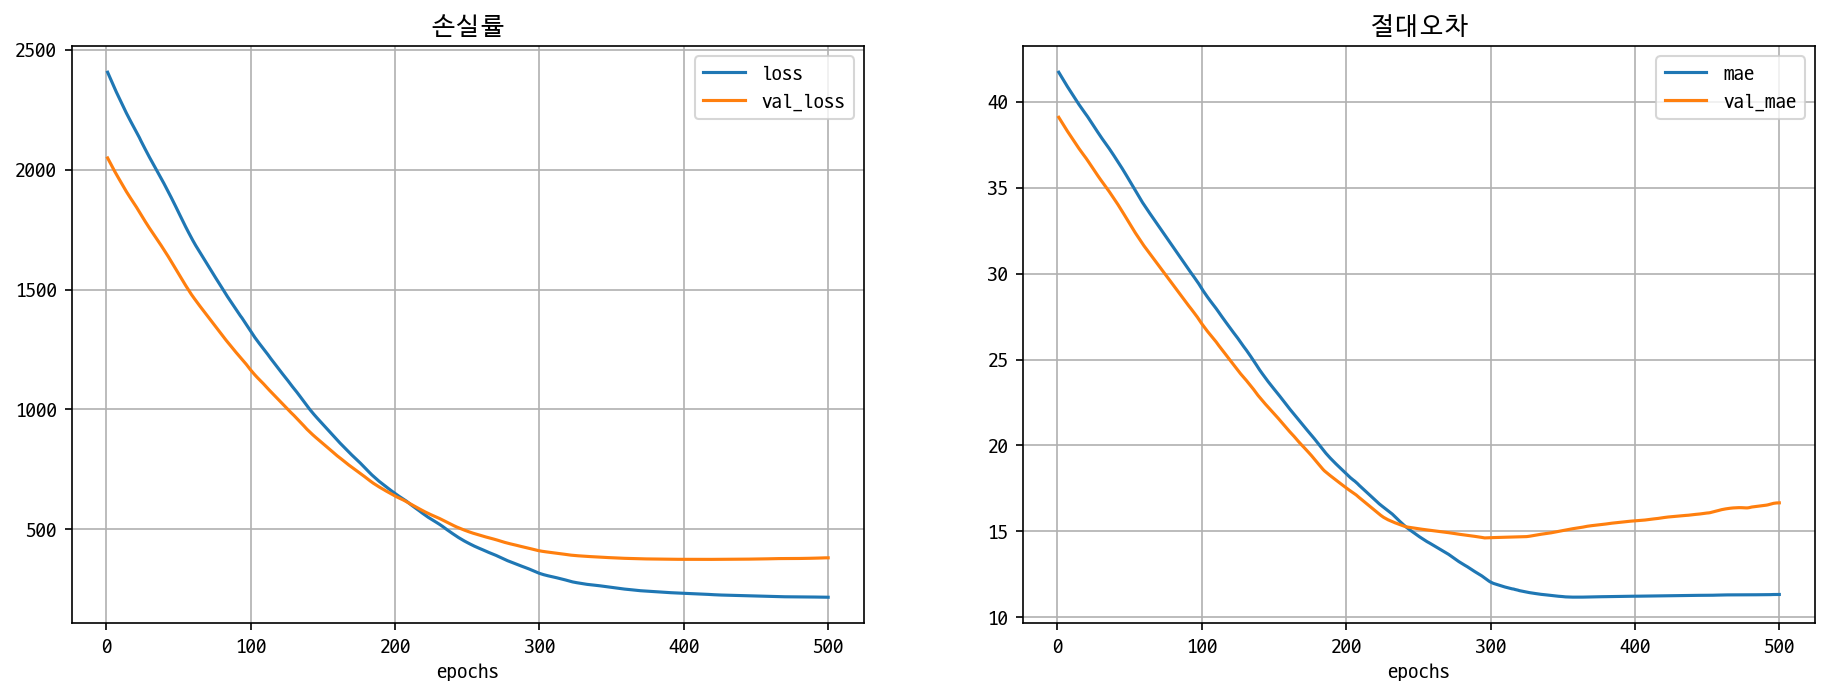

In [34]:
# 결과 시각화
fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=150)
result_df.plot(y=['loss', 'val_loss'], ax=ax[0])
result_df.plot(y=['mae', 'val_mae'], ax=ax[1])
ax[0].set_title('손실률')
ax[1].set_title('절대오차')
ax[0].grid()
ax[1].grid()
plt.show()
plt.close()

In [35]:
# 검증데이터에 대한 예측결과 산정
pred =  model.predict(x_test, verbose=0)
pred

array([[49.502075],
       [35.41285 ],
       [32.59501 ],
       [57.955612],
       [21.323631],
       [46.68423 ],
       [57.955612],
       [52.31992 ],
       [41.048546],
       [24.141474],
       [52.31992 ],
       [55.137764],
       [46.68423 ],
       [52.31992 ],
       [38.230694]], dtype=float32)

In [36]:
kdf = pd.DataFrame({
    '검증데이터': x_test['speed'],
    '실제값': y_test,
    '예측값' : pred.flatten()
})

kdf['오차'] = kdf['실제값']-kdf['예측값']

kdf

,검증데이터,실제값,예측값,오차
28,17,32,49.502075,-17.502075
11,12,14,35.412849,-21.412849
10,11,28,32.595009,-4.595009
41,20,56,57.955612,-1.955612
2,7,4,21.323631,-17.323631
27,16,40,46.684231,-6.684231
38,20,32,57.955612,-25.955612
31,18,42,52.319920,-10.319920
22,14,80,41.048546,38.951454
4,8,16,24.141474,-8.141474


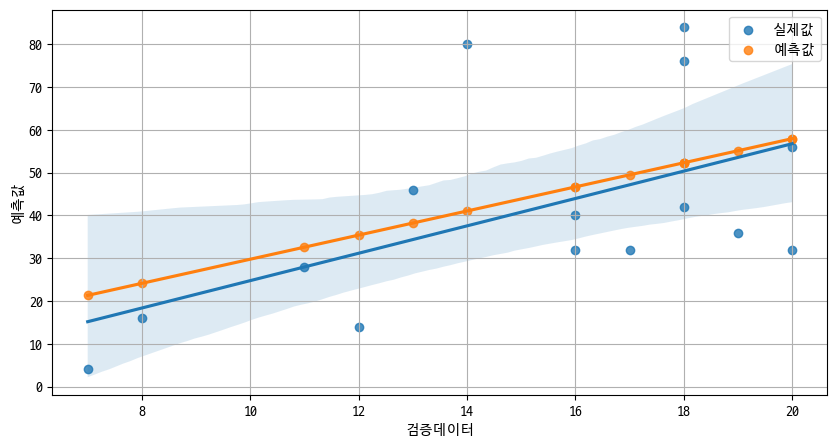

In [37]:
fig = plt.figure(figsize=(10, 5), dpi=100)
ax = fig.gca()

sns.regplot(data=kdf, x='검증데이터', y='실제값', label='실제값', ax=ax)
sns.regplot(data=kdf, x='검증데이터', y='예측값', label='예측값', ax=ax)
ax.legend()
ax.grid()
plt.show()
plt.close()

In [38]:
my_speed = 50
my_speed_arr = np.array([[my_speed]])
my_dist = model.predict(my_speed_arr, verbose=0)
print("속도가 %d인 자동차의 제동거리는 %d로 예상됩니다." % (my_speed, my_dist))

속도가 50인 자동차의 제동거리는 142로 예상됩니다.


- ipywidgets의 interact : 슬라이드 바를 생성하여 입력값을 받음

In [39]:
@interact(x= (0, 100, 1))
def test(x):
    #print(x)
    input_x = np.array([[x]])
    output_y = model.predict(input_x, verbose=0)
    print("속도가 %d인 자동차의 제동거리는 %d로 예상됩니다." % (x, output_y))

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

- 콜백함수
  - EarlyStopping : 일정 에포크 이상(patience) 진행해도 성능향상이 없을 경우 학습을 스스로 중단
  - ReduceLROnPlateau : 일정 에포크동안 성능향상이 없을 경우 학습률을 조정
    - factor : 학습률 조정에 사용할 값 (기존 학습률에 곱함)
    - patience : 지정한 에포크 수만큼 성능향상이 없을 경우 콜백함수 실행
    - min_lr : 학습률의 하한
  - ModelCheckpoint : 지정한 평가지포를 기준으로 가장 뛰어난 성능을 보이는 모델을 저장
    - filepath : 모델 저장 경로
    - save_best_only : True이면 가장 뛰어난 모델만 저장
    - save_weights_only : 모델의 가중치만 저장

# Fish 데이터

In [40]:
# 데이터 로드
origin3 = pd.read_excel("./data/fish.xlsx")
origin3.head()

,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


In [41]:
# 데이터 전처리 및 훈련 / 검증 데이터 분리
# x_train, x_test, y_train, y_test = my_train_test_split(origin3, yname = '무게', test_size = 0.25, scalling = True)
X = origin3.copy()
Y = X.pop('무게')

ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X), columns = X.columns)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
_, cols = x_train.shape

In [42]:
# 옵티마이저 정의
adam = Adam(learning_rate = 0.01, epsilon = 1e-07)

In [45]:
%%time
# 모델 구성 및 훈련
model2 = Sequential()
model2.add(Dense(64, activation = 'relu', input_shape = (cols, )))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(1, activation = 'linear'))
model2.summary()

model2.compile(optimizer = adam, loss = 'mse', metrics = ['mae'])
history = model2.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 1000, callbacks = [
    EarlyStopping(monitor = 'val_loss', patience = 12),
    ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 4, min_lr = 0.0001),
    ModelCheckpoint("./models/Best_Fish.keras", save_best_only = True)
])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step - loss: 300579.0000 - mae: 404.5239 - val_loss: 170584.9531 - val_mae: 323.1951 - learning_rate: 0.0100
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 285430.7500 - mae: 394.9812 - val_loss: 170251.7188 - val_mae: 322.7478 - learning_rate: 0.0100
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 308982.4062 - mae: 416.4394 - val_loss: 169834.6250 - val_mae: 322.1606 - learning_rate: 0.0100
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 306323.4375 - mae: 408.4601 - val_loss: 169249.7656 - val_mae: 321.3365 - learning_rate: 0.0100
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 293866.2500 - mae: 400.6492 - val_loss: 168407.6562 - val_mae: 320.1607 - learning_rate: 0.0100
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 299944.3125 - mae: 402.6825 - val_loss: 167233.2188 - val_mae: 318.5251 - learning_rate: 0.0100
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 290415.343

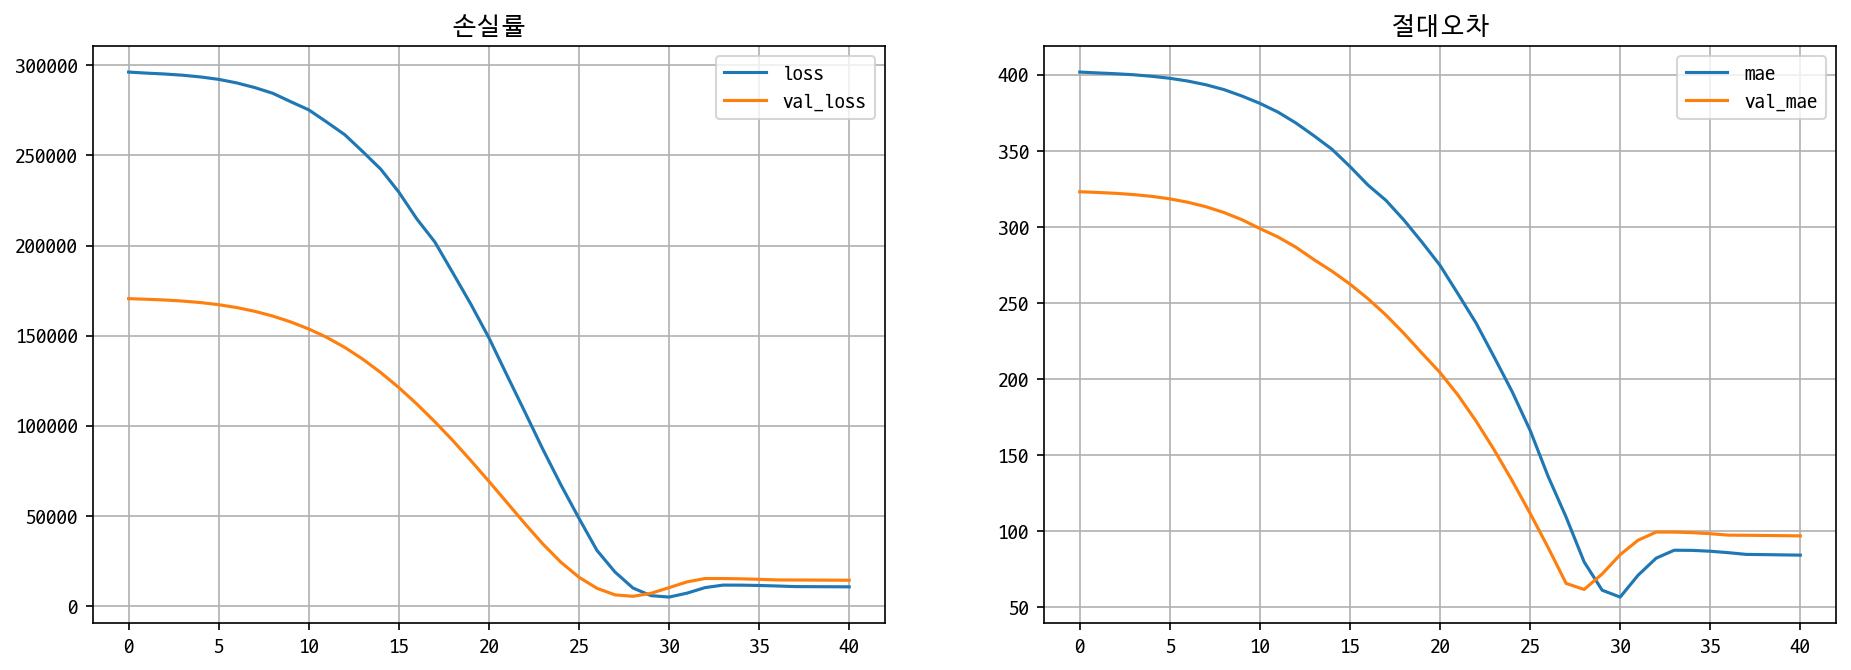

In [46]:
# 훈련 결과 확인
result_df = pd.DataFrame(history.history)

fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=150)
result_df.plot(y=['loss', 'val_loss'], ax=ax[0])
result_df.plot(y=['mae', 'val_mae'], ax=ax[1])
ax[0].set_title('손실률')
ax[1].set_title('절대오차')
ax[0].grid()
ax[1].grid()
plt.show()
plt.close()